In [16]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from matplotlib import cm, colors
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams["axes.grid"] = False

%matplotlib inline

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
num_components = 8
pca = PCA(n_components=num_components, whiten=True)
X_r = pca.fit(X).transform(X)

In [74]:
X_r.shape

(70000, 8)

In [75]:
total_explained = np.sum(pca.explained_variance_ratio_)
total_explained

0.438165327223643

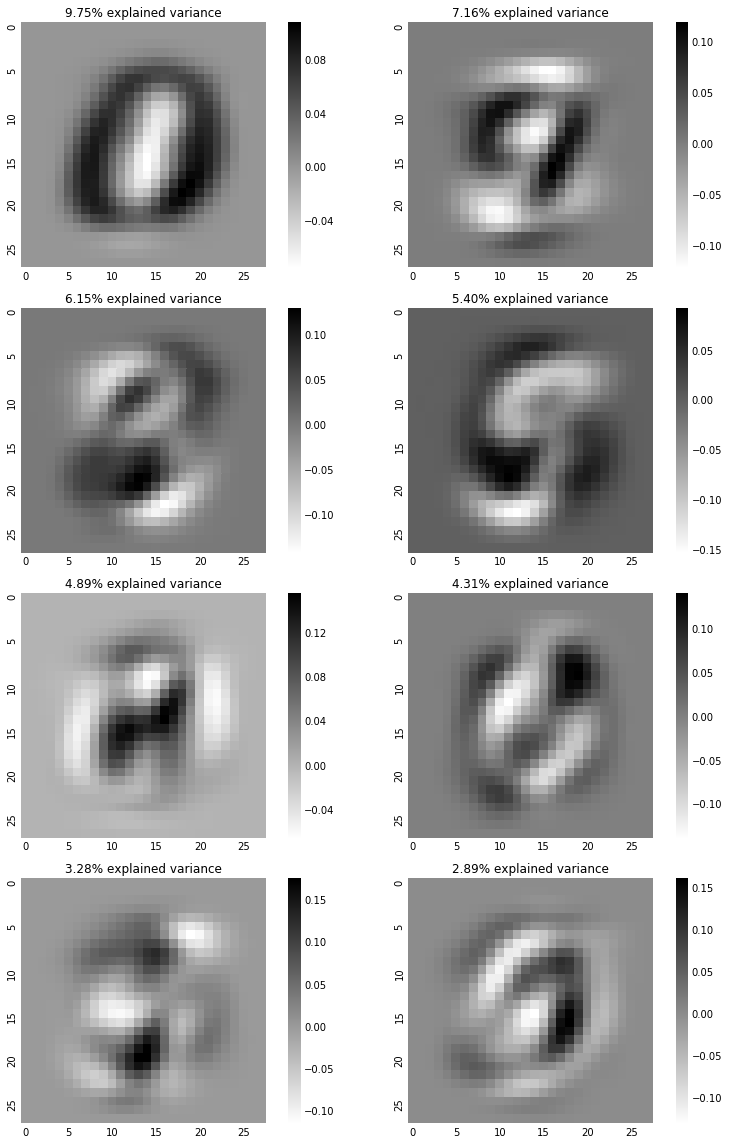

In [76]:
fig, axarr = plt.subplots(num_components//2, 2, figsize=(12, 2*num_components))

for comp in range(num_components):
    col = comp // 2
    row = comp % 2
    sns.heatmap(pca.components_[comp, :].reshape(28, 28), 
                xticklabels=5, yticklabels=5, ax=axarr[col, row], cmap='gray_r')
    axarr[col, row].set_title(
        "{0:.2f}% explained variance".format(pca.explained_variance_ratio_[comp]*100),
        fontsize=12)
    axarr[col, row].set_aspect('equal')

#plt.suptitle('{0:d}-component PCA, {0:.2f}% total explained variance'.format(num_components, total_explained))
plt.tight_layout()

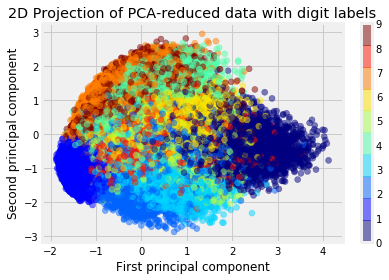

In [108]:
num_classes = 10
#sim_colors = cm.ScalarMappable(cmap=cm.jet, norm=colors.Normalize(vmin=0, vmax=num_classes - 1))
y_task = y.astype(int)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_task, cmap=cm.get_cmap('jet', num_classes), alpha=0.5)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("2D Projection of PCA-reduced data with digit labels")
plt.tight_layout()
plt.colorbar()

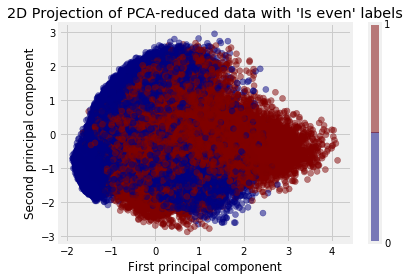

In [110]:
num_classes = 2
#sim_colors = cm.ScalarMappable(cmap=cm.jet, norm=colors.Normalize(vmin=0, vmax=num_classes - 1))
y_task = y.astype(int)
#y_task = (y_task > 4).astype(int)
y_task = (y_task%2 == 0)
plt.scatter(X_r[:, 0], X_r[:, 1], c=y_task, cmap=cm.get_cmap('jet', num_classes), alpha=0.5)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("2D Projection of PCA-reduced data with 'Is even' labels")
plt.tight_layout()
plt.colorbar(ticks=[0, 1])

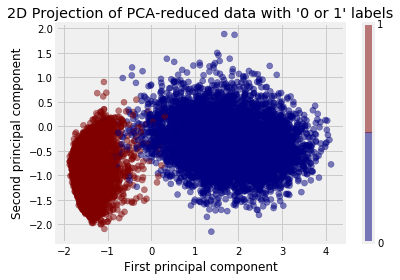

In [112]:
num_classes = 2
#sim_colors = cm.ScalarMappable(cmap=cm.jet, norm=colors.Normalize(vmin=0, vmax=num_classes - 1))
y_task = y.astype(int)
only_01 = (y_task < 2)
y_task = y_task[only_01]
X_task = X_r[only_01, :]
plt.scatter(X_task[:, 0], X_task[:, 1], c=y_task, cmap=cm.get_cmap('jet', num_classes), alpha=0.5)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("2D Projection of PCA-reduced data with '0 or 1' labels")
plt.tight_layout()
plt.colorbar(ticks=[0, 1])

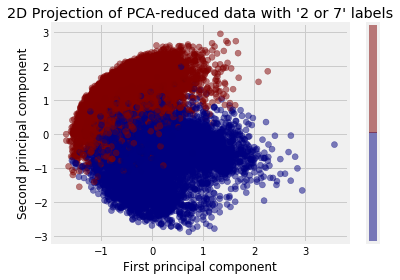

In [114]:
num_classes = 2
#sim_colors = cm.ScalarMappable(cmap=cm.jet, norm=colors.Normalize(vmin=0, vmax=num_classes - 1))
y_task = y.astype(int)
#y_task = (y_task > 4).astype(int)
only_27 = np.isin(y_task, [2, 7])
y_task = y_task[only_27]
X_task = X_r[only_27, :]
plt.scatter(X_task[:, 0], X_task[:, 1], c=y_task, cmap=cm.get_cmap('jet', num_classes), alpha=0.5)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("2D Projection of PCA-reduced data with '2 or 7' labels")
plt.tight_layout()
plt.colorbar(ticks=[0, 1])

## Qubit encoding

In [13]:
def whiten(arr):
    arr_mean = np.mean(arr)
    arr_std = np.std(arr)
    whitened = (arr - arr_mean)/arr_std
    return whitened

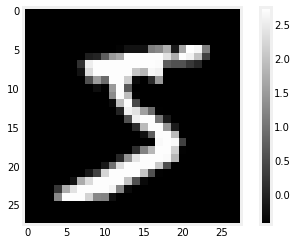

In [17]:
plt.imshow(whiten(X[0, :].reshape(28, 28)), cmap='gray')

plt.colorbar()

(-0.5, 0.5, 7.5, -0.5)

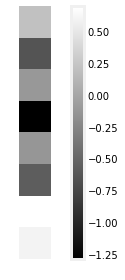

In [26]:
plt.imshow(X_r[0, :].reshape(8, 1), cmap='gray')
plt.colorbar()
plt.tight_layout()
plt.axis('off')

In [27]:
def rescale_to_angle(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    rescaled_unit = (arr - arr_min)/(arr_max - arr_min)
    return rescaled_unit*0.5*np.pi

(-0.5, 0.5, 7.5, -0.5)

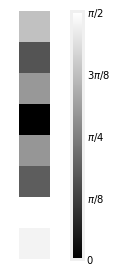

In [30]:
plt.imshow(rescale_to_angle(X_r[0, :].reshape(8, 1)), cmap='gray')
cb = plt.colorbar(ticks=np.linspace(0., 0.5*np.pi, 5))
cb.ax.set_yticklabels(['0', '$\pi/8$', '$\pi/4$', '$3\pi/8$', '$\pi/2$'])
plt.tight_layout()
plt.axis('off')

In [32]:
rescale_to_angle(X_r[0, :])

array([1.1875384 , 0.51702793, 0.93284813, 0.        , 0.92587783,
       0.57499405, 1.57079633, 1.49345589])